## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)

#if (!requireNamespace("KEGG.db", quietly = TRUE))
#    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)

#if (!requireNamespace("MetENP", quietly = TRUE))
#    devtools::install("..", upgrade = "never")



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [2]:
USER_HOME=Sys.getenv("HOME");
USER_PWD=Sys.getenv("PWD");
#.libPaths( c( .libPaths(), paste0(USER_HOME, "/.local/R") ))
.libPaths( c( .libPaths(), paste0(USER_PWD, "/../../R") )); # suitable path to where MetENP R package is installed
#.libPaths( c( .libPaths(), paste0("../../R") )); # suitable path to where MetENP R package is installed

library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://github.com/metabolomicsworkbench/MetENP) and load libraries and functions
#### Complete information for this study is at Metabolomics Workbench: https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?Mode=Study&StudyID=ST001256&StudyType=MS&ResultType=1

In [3]:
data = getmwstudies('ST001256', 'data')
head(data)

analysis_id,analysis_summary,metabolite_name,metabolite_id,refmet_name,McN-Mat-20180411-01,McN-Mat-20180411-02,McN-Mat-20180411-03,McN-Mat-20180411-04,McN-Mat-20180411-05,McN-Mat-20180411-06,McN-Mat-20180411-07,McN-Mat-20180411-08,McN-Mat-20180411-09
<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AN002085,HILIC UN....,"2,3-Diph....",ME293942,"2,3-Diph....",26654.990000000,29677.610000000,28693.690000000,11246.000000000,13157.040000000,10464.740000000,27334.890000000,26029.420000000,28815.350000000
AN002085,HILIC UN....,2'-Deoxy....,ME293943,dGMP,NA,NA,NA,NA,NA,NA,NA,NA,NA
AN002085,HILIC UN....,2-Ketobu....,ME293941,3-Methyl....,3299736.890000000,3210889.390000000,2824324.630000000,1477468.830000000,1762803.460000000,1731317.970000000,1270576.470000000,1382472.710000000,2155468.940000000
AN002085,HILIC UN....,3-Phosph....,ME293944,3-Phosph....,92536335.660000000,86843435.760000000,69591836.610000000,51858282.310000000,8848150.420000000,32460734.540000000,90585595.880000000,69562383.720000000,74583327.340000000
AN002085,HILIC UN....,"4,5-Dihy....",ME293946,"4,5-Dihy....",NA,NA,NA,5357.430000000,NA,7113.520000000,5663.870000000,5419.570000000,7555.070000000
AN002085,HILIC UN....,4-Hydrox....,ME293945,cis-4-Hy....,3473026.050000000,3979179.220000000,2985984.780000000,3056578.630000000,2895182.250000000,2984481.350000000,1935756.180000000,3072286.300000000,2407110.820000000


In [4]:
metadata = getmwstudies('ST001256', 'factors')
head(metadata)

,study_id,local_sample_id,sample_source,factors,mb_sample_id,raw_data,Treatment
,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST001256,McN-Mat-....,Muscle,Treatmen....,SA091299,,daily prednisone
2,ST001256,McN-Mat-....,Muscle,Treatmen....,SA091301,,daily prednisone
3,ST001256,McN-Mat-....,Muscle,Treatmen....,SA091300,,daily prednisone
4,ST001256,McN-Mat-....,Muscle,Treatmen....,SA091304,,vehicle
5,ST001256,McN-Mat-....,Muscle,Treatmen....,SA091303,,vehicle
6,ST001256,McN-Mat-....,Muscle,Treatmen....,SA091302,,vehicle


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:

refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,refmet_name,McN-Mat-20180411-01,McN-Mat-20180411-02,McN-Mat-20180411-03,McN-Mat-20180411-04,McN-Mat-20180411-05,McN-Mat-20180411-06,McN-Mat-20180411-07,McN-Mat-20180411-08,McN-Mat-20180411-09,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2-Ketobutyric acid,AN002085,HILIC UN....,ME293941,3-Methyl....,3299736.890000000,3210889.390000000,2824324.630000000,1477468.830000000,1762803.460000000,1731317.970000000,1270576.470000000,1382472.710000000,2155468.940000000,C4H6O3,Fatty Acyls,Fatty acids,Oxo FA
2,"2,3-Diphosphoglyceric acid",AN002085,HILIC UN....,ME293942,"2,3-Diph....",26654.990000000,29677.610000000,28693.690000000,11246.000000000,13157.040000000,10464.740000000,27334.890000000,26029.420000000,28815.350000000,C3H8O10P2,Organic acids,Short-chain acids,Short-chain acids
3,2'-Deoxyguanosine 5'-monophosphate,AN002085,HILIC UN....,ME293943,dGMP,NA,NA,NA,NA,NA,NA,NA,NA,NA,C10H14N5O7P,Nucleic acids,Purines,Purine dNMP
4,3-Phosphoglyceric acid,AN002085,HILIC UN....,ME293944,3-Phosph....,92536335.660000000,86843435.760000000,69591836.610000000,51858282.310000000,8848150.420000000,32460734.540000000,90585595.880000000,69562383.720000000,74583327.340000000,C3H7O7P,Organic acids,Short-chain acids,Short-chain acids
5,4-Hydroxyproline,AN002085,HILIC UN....,ME293945,cis-4-Hy....,3473026.050000000,3979179.220000000,2985984.780000000,3056578.630000000,2895182.250000000,2984481.350000000,1935756.180000000,3072286.300000000,2407110.820000000,C5H9NO3,Organic acids,Amino acids and peptides,Amino acids
6,"4,5-Dihydroorotic acid",AN002085,HILIC UN....,ME293946,"4,5-Dihy....",NA,NA,NA,5357.430000000,NA,7113.520000000,5663.870000000,5419.570000000,7555.070000000,C5H6N2O4,Organic acids,Amino acids and peptides,Amino acids


In [6]:
unique(metadata$factors)


[[1]]
[1] "Treatment:daily prednisone"

[[2]]
[1] "Treatment:vehicle"

[[3]]
[1] "Treatment:weekly prednisone"

In [7]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "HILIC UNSPECIFIED ION MODE"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [8]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c("HILIC UNSPECIFIED ION MODE"), metadata=metadata, factor1='daily prednisone', factor2=c('vehicle'), factor_col='Treatment',sample_col='local_sample_id', p_adjust='fdr',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.05&abs(stats_metabolites[,"log2Fold_change"])>0.5),]


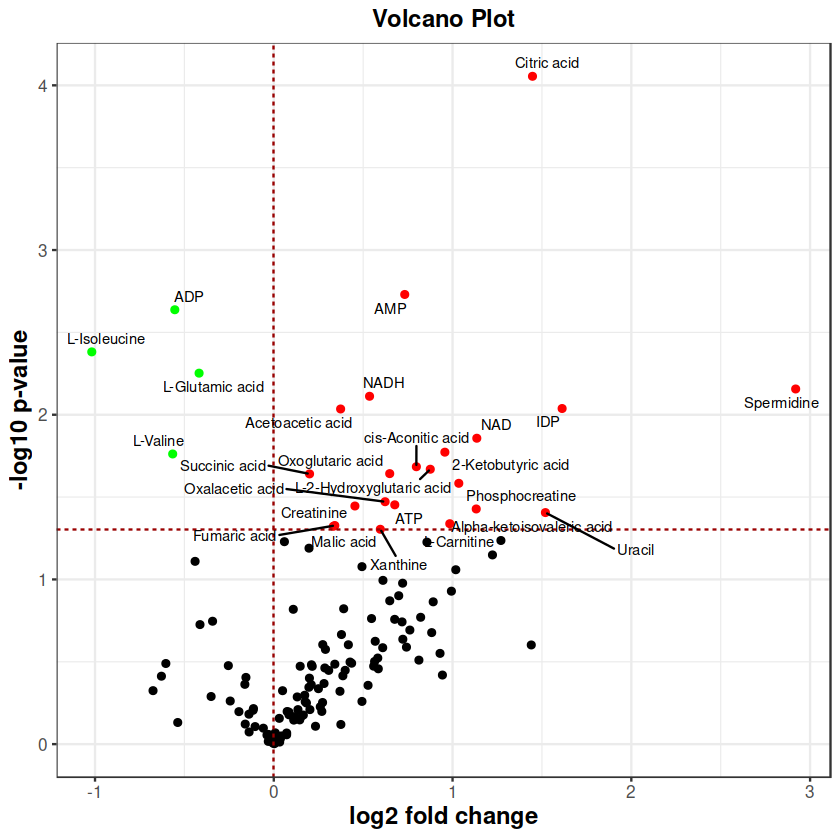

In [9]:
plot_volcano(stats_metabolites, thres_pval= 0.05,thres_log2foldchange = 0.0, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [10]:

sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [11]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

character(0)

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [12]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.0, updown_fillcolor=c("red", "green"))
print(count_changes$sig_met_count)

                    sub_class No.of_metabolites                 color
1                 Amino acids                 1 increased metabolites
2                 Branched FA                 1 increased metabolites
3                  Carnitines                 1 increased metabolites
4          Dicarboxylic acids                 1 increased metabolites
5  Nicotinamide dinucleotides                 2 increased metabolites
6           Other pyrimidines                 1 increased metabolites
7                      Oxo FA                 1 increased metabolites
8                  Polyamines                 1 increased metabolites
9                 Purine rNDP                 1 increased metabolites
10                Purine rNMP                 1 increased metabolites
11                Purine rNTP                 1 increased metabolites
12                  TCA acids                 4 increased metabolites
13                  Xanthines                 1 increased metabolites
14                Am

Warning message:
“Use of `count_changes[[metclass]]` is discouraged.
ℹ Use `.data[[metclass]]` instead.”


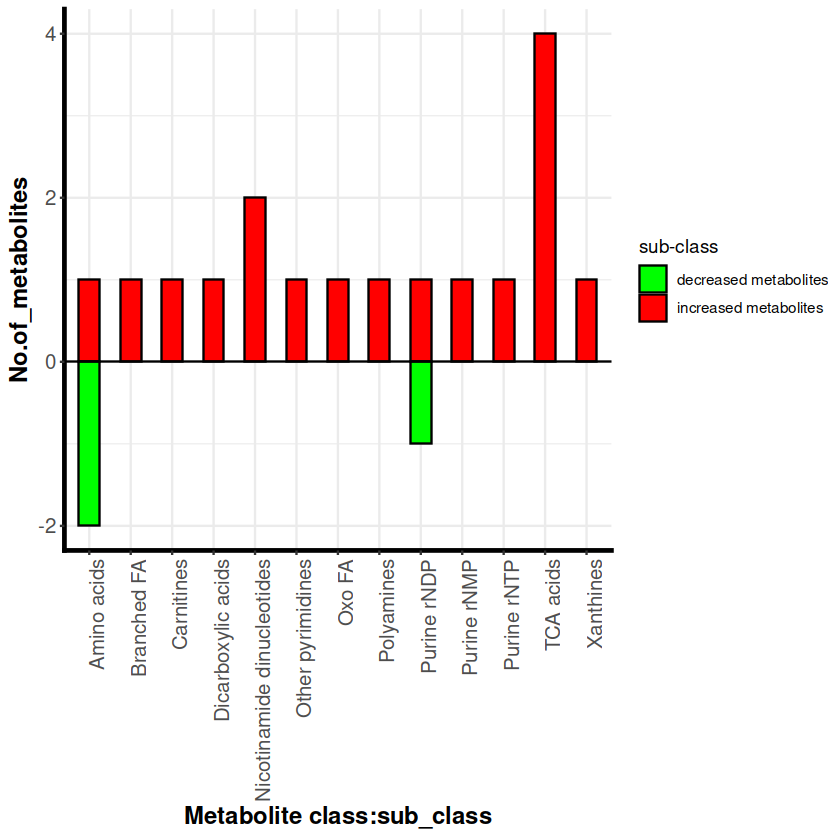

In [13]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [14]:
# pass debug = 0 below or comment some lines to suppress some print output
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=1, debug = 1)
print(head(metenrichment))
#knitr::kable(head(metenrichment))
metenrichment[metenrichment$main_class %in% c("Ceramides", "Sphingomyelins"), c("Metabolite", "pval", "super_class", "main_class", "sub_class", "HG p-value")]
colnames(metenrichment)
metenrichment$super_class
metenrichment$main_class
metenrichment$sub_class

[1] "Name = 2-Hydroxyglutaric acid"
[1] "M = 1"                  "L = 20"                 "N = 172"               
[4] "k = 3"                  "pp = 0.311445508435933"
[1] "Name = 2-Oxoglutaric acid"
[1] "M = 4"                   "L = 20"                 
[3] "N = 172"                 "k = 9"                  
[5] "pp = 0.0116532073529628"
[1] "Name = 3-Methyl pyruvic acid"
[1] "M = 1"                  "L = 20"                 "N = 172"               
[4] "k = 4"                  "pp = 0.392931247082568"
[1] "Name = ADP"
[1] "M = 2"                  "L = 20"                 "N = 172"               
[4] "k = 5"                  "pp = 0.103850888550457"
[1] "Name = AMP"
[1] "M = 1"                  "L = 20"                 "N = 172"               
[4] "k = 5"                  "pp = 0.465201336715595"
[1] "Name = ATP"
[1] "M = 1"                  "L = 20"                 "N = 172"               
[4] "k = 3"                  "pp = 0.311445508435933"
[1] "Name = Carnitine"
[1] "M = 1"     

Metabolite,pval,super_class,main_class,sub_class,HG p-value
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>


[1] "refmet_name"           "Exact mass"            "KEGG ID"              
 [4] "Metabolite"            "daily prednisone_mean" "vehicle_mean"         
 [7] "Fold_change"           "log2Fold_change"       "t_value"              
[10] "pval"                  "padj"                  "metabolite_id"        
[13] "super_class"           "main_class"            "sub_class"            
[16] "formula"               "HG p-value"

[1] "Fatty Acyls"                "Organic acids"             
 [3] "Fatty Acyls"                "Nucleic acids"             
 [5] "Nucleic acids"              "Nucleic acids"             
 [7] "Organic nitrogen compounds" "Organic acids"             
 [9] "Organic acids"              "Nucleic acids"             
[11] "Organic acids"              "Fatty Acyls"               
[13] "Nucleic acids"              "Nucleic acids"             
[15] "Organic acids"              "Organic acids"             
[17] "Alkaloids"                  "Nucleic acids"             
[19] "Organic acids"              "Nucleic acids"

[1] "Fatty acids"              "TCA acids"               
 [3] "Fatty acids"              "Purines"                 
 [5] "Purines"                  "Purines"                 
 [7] "Carnitines"               "TCA acids"               
 [9] "TCA acids"                "Purines"                 
[11] "Amino acids and peptides" "Fatty acids"             
[13] "Nicotinamides"            "Nicotinamides"           
[15] "TCA acids"                "Amino acids and peptides"
[17] "Ornithine alkaloids"      "Pyrimidines"             
[19] "Amino acids and peptides" "Purines"

[1] "Dicarboxylic acids"         "TCA acids"                 
 [3] "Oxo FA"                     "Purine rNDP"               
 [5] "Purine rNMP"                "Purine rNTP"               
 [7] "Carnitines"                 "TCA acids"                 
 [9] "TCA acids"                  "Purine rNDP"               
[11] "Amino acids"                "Branched FA"               
[13] "Nicotinamide dinucleotides" "Nicotinamide dinucleotides"
[15] "TCA acids"                  "Amino acids"               
[17] "Polyamines"                 "Other pyrimidines"         
[19] "Amino acids"                "Xanthines"

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged.
ℹ Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged.
ℹ Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged.
ℹ Use `.data[[enrich_stats]]` instead.”


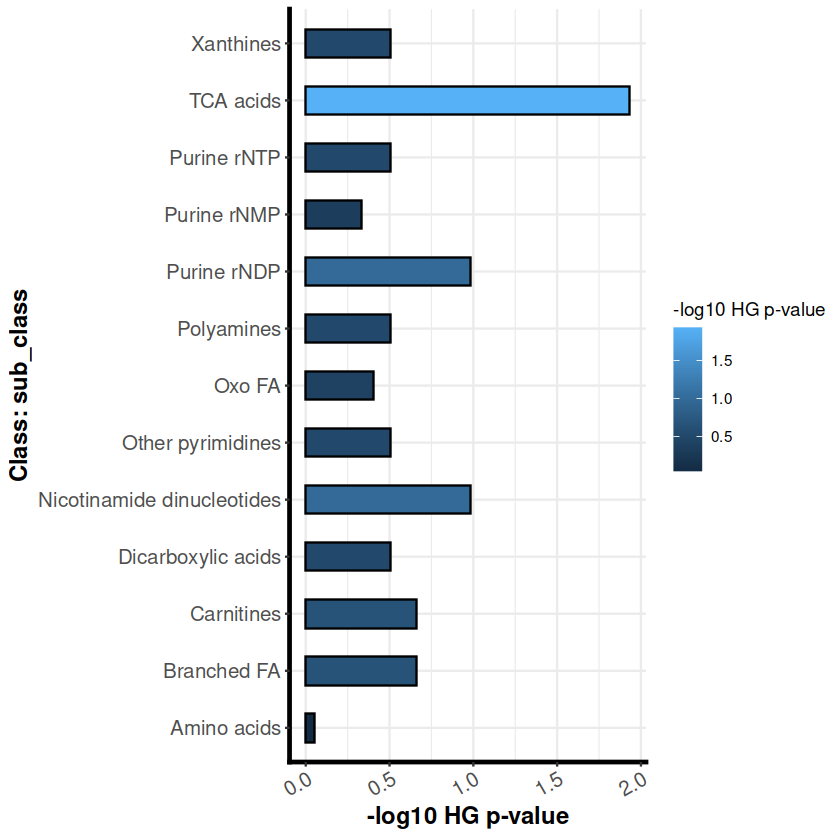

In [15]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=1)

### Check the pathways with reactions of all the significant metabolites

In [16]:
met_path = met_pathways(df_metenrichment = metenrichment, 'hsa')
head(met_path)

,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,daily prednisone_mean,vehicle_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R00021,2-Oxoglutaric acid,146.0215,C00026,Oxoglutaric acid,5630609,8826082,1.5675182,0.6484822,-3.601172,⋯,ME294076,Organic acids,TCA acids,TCA acids,C5H6O5,0.01165321,L-glutam....,Glyoxylate and dicarboxylate metabolism,rn00630,hsa00630
2,R00021,2-Oxoglutaric acid,146.0215,C00026,Oxoglutaric acid,5630609,8826082,1.5675182,0.6484822,-3.601172,⋯,ME294076,Organic acids,TCA acids,TCA acids,C5H6O5,0.01165321,L-glutam....,Nitrogen metabolism,rn00910,hsa00910
3,R00086,ADP,427.0294,C00008,ADP,33315209,22696705,0.6812716,-0.5536981,7.037444,⋯,ME293956,Nucleic acids,Purines,Purine rNDP,C10H15N5O10P2,0.10385089,ATP phos....,Purine metabolism,rn00230,hsa00230
4,R00086,ADP,427.0294,C00008,ADP,33315209,22696705,0.6812716,-0.5536981,7.037444,⋯,ME293956,Nucleic acids,Purines,Purine rNDP,C10H15N5O10P2,0.10385089,ATP phos....,Metabolic pathways,rn01100,hsa01100
5,R00086,ADP,427.0294,C00008,ADP,33315209,22696705,0.6812716,-0.5536981,7.037444,⋯,ME293956,Nucleic acids,Purines,Purine rNDP,C10H15N5O10P2,0.10385089,ATP phos....,Nucleotide metabolism,rn01232,hsa01232
6,R00086,ATP,506.9958,C00002,ATP,4328218,6918891,1.5985542,0.6767676,-4.121272,⋯,ME293964,Nucleic acids,Purines,Purine rNTP,C10H16N5O13P3,0.31144551,ATP phos....,Purine metabolism,rn00230,hsa00230


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [17]:
setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

character(0)

### Get pathway enrichment sore.

This function also utilizes korg dataset from pathview package.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here I have used hypergeometric (HG) score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways.

N = total no. of compounds/metabolites linked to all kegg pathways or the total number of metabolites detected in a study.

In the former case, this step might take long time, so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. Save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of significant metabolites detected in a study

M = No. of significant metabolites detected in a metabolite class or pathway

k = Total no. of metabolites detected in a metabolite class/pathway

p-value = phyper(M-1, L, N-L, k, lower.tail=FALSE) # as in the actual R code # originally, it was wriiten as: phyper(M, L, N-L, K)

This function also utilizes korg dataset from pathview package.

In [18]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='fdr', kegg_comp_path=FALSE)

In [19]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,"Alanine, aspartate and glutamate metabolism",8,28,0.005949329,0.06448604
2,alpha-Linolenic acid metabolism,8,44,0.099765886,0.40493212
3,Amino sugar and nucleotide sugar metabolism,5,118,0.999997382,1.00000000
4,Aminoacyl-tRNA biosynthesis,5,52,0.785141512,1.00000000
5,Arachidonic acid metabolism,4,79,0.997590429,1.00000000
6,Arginine and proline metabolism,8,69,0.595313812,1.00000000


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


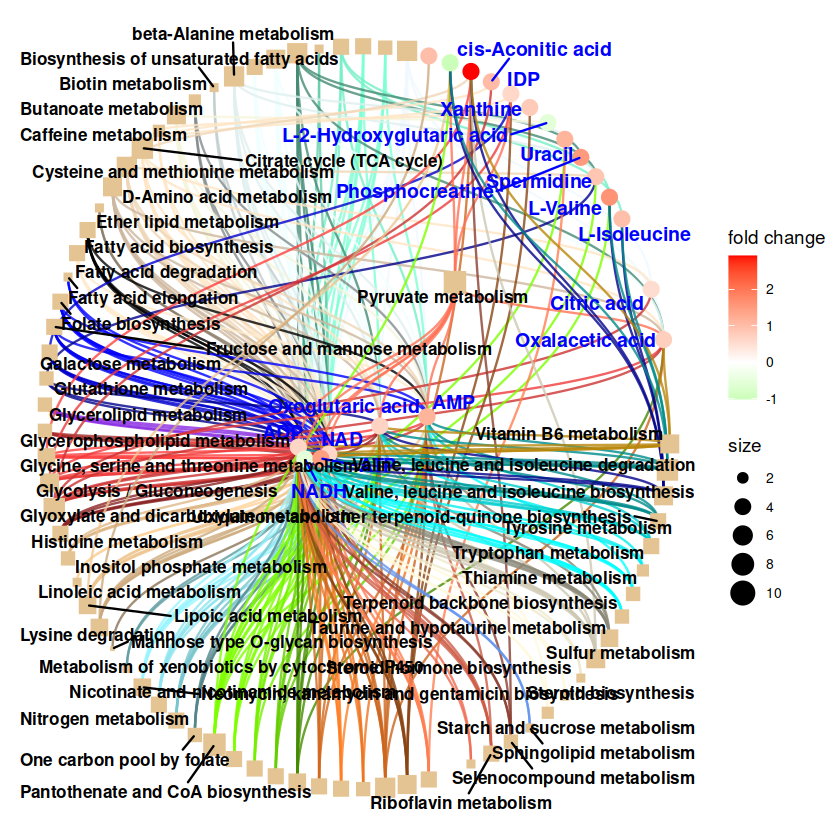

In [20]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

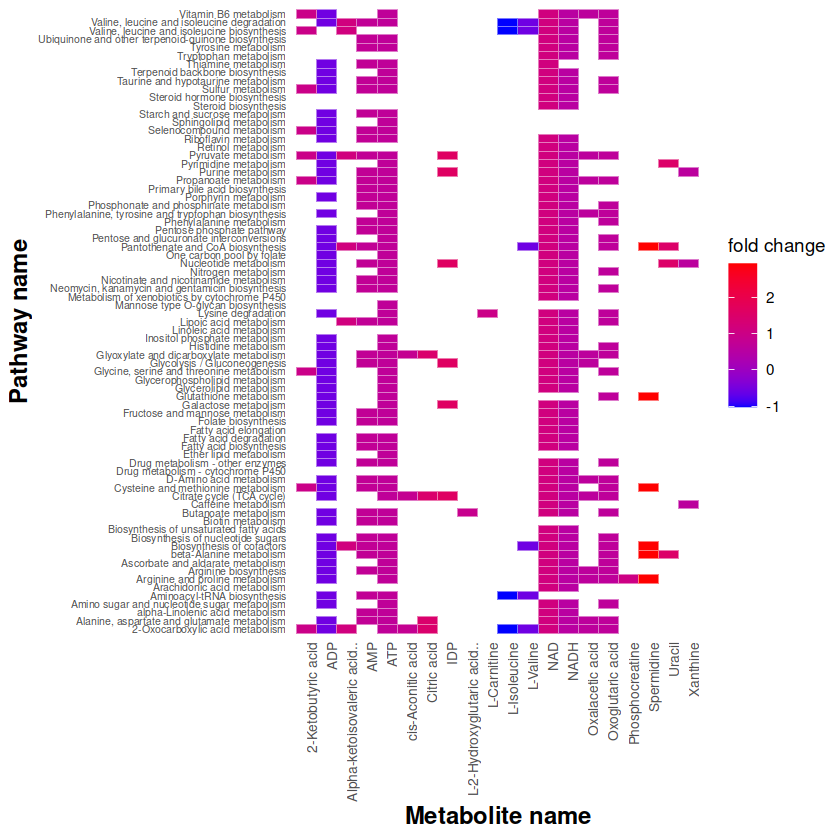

In [21]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged.
ℹ Use `.data[["pathway_HG p-value"]]` instead.”


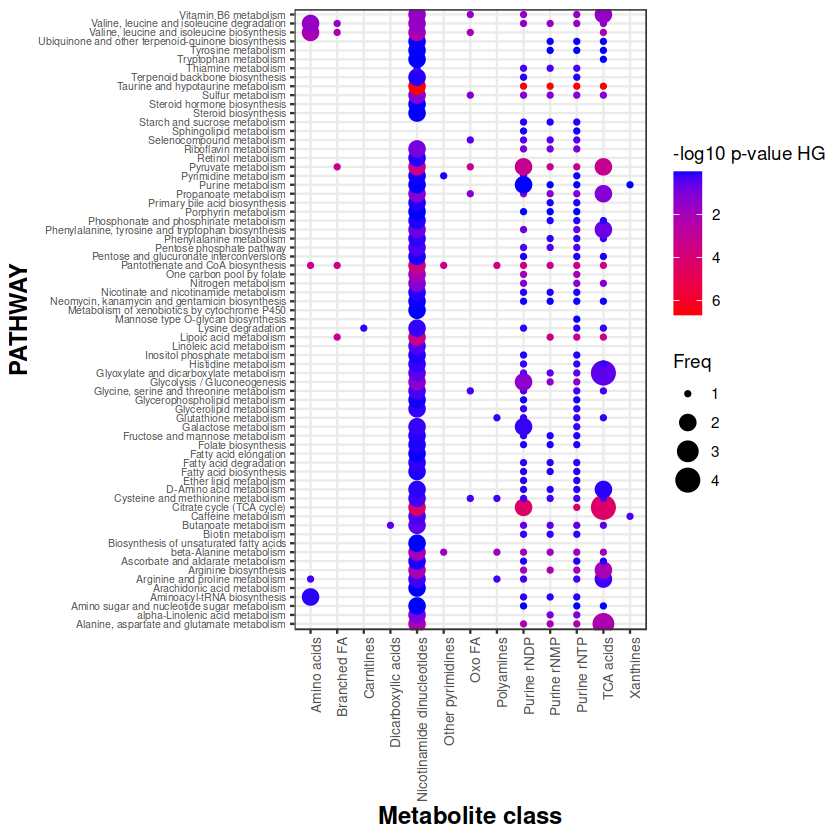

In [22]:

dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [24]:
met_gene_info = enzyme_gene_info (metenrichment, "hsa","sub_class")
head(met_gene_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K00006,glycerol-3-phosphate dehydrogenase (NAD+) [EC:1.1.1.8],23171,(RefSeq)....,Homo sap....,Glycerop....,NCBI-Gen....,Pfam: NA....,R00842,NADH,C00004,Nicotinamide dinucleotides,sn-glyce....,RC00001 ....,C00093 +....,sn-Glyce....,"1.1.1.8,...."
2,K00006,glycerol-3-phosphate dehydrogenase (NAD+) [EC:1.1.1.8],23171,(RefSeq)....,Homo sap....,Glycerop....,NCBI-Gen....,Pfam: NA....,R00842,NAD,C00003,Nicotinamide dinucleotides,sn-glyce....,RC00001 ....,C00093 +....,sn-Glyce....,"1.1.1.8,...."
3,K00006,glycerol-3-phosphate dehydrogenase (NAD+) [EC:1.1.1.8],2819,(RefSeq)....,Homo sap....,Glycerop....,NCBI-Gen....,Pfam: NA....,R00842,NADH,C00004,Nicotinamide dinucleotides,sn-glyce....,RC00001 ....,C00093 +....,sn-Glyce....,"1.1.1.8,...."
4,K00006,glycerol-3-phosphate dehydrogenase (NAD+) [EC:1.1.1.8],2819,(RefSeq)....,Homo sap....,Glycerop....,NCBI-Gen....,Pfam: NA....,R00842,NAD,C00003,Nicotinamide dinucleotides,sn-glyce....,RC00001 ....,C00093 +....,sn-Glyce....,"1.1.1.8,...."
5,K00008,L-iditol 2-dehydrogenase [EC:1.1.1.14],6652,(RefSeq)....,Homo sap....,Pentose ....,NCBI-Gen....,Pfam: AD....,R00875,NADH,C00004,Nicotinamide dinucleotides,D-glucit....,RC00001 ....,C00794 +....,D-Sorbit....,1.1.1.14....
6,K00008,L-iditol 2-dehydrogenase [EC:1.1.1.14],6652,(RefSeq)....,Homo sap....,Pentose ....,NCBI-Gen....,Pfam: AD....,R01896,NADH,C00004,Nicotinamide dinucleotides,xylitol:....,RC00001 ....,C00379 +....,Xylitol ....,"1.1.1.9,...."


#### Get the information if metabolite is a reactant or substrate

In [ ]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

#### Get gene info in short form

In [ ]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']